In [1]:
R.version
options(warn=-1)

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [2]:
library(DiffBind)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


At

In [4]:
CorcesDataInfo =read.csv("./corces_2016_progenitors_peakset.csv",
                          sep = ";",stringsAsFactors=FALSE) 
head(CorcesDataInfo)

,SampleID,Tissue,Condition,DonorID,Treatment,bamReads,Replicate,ControlID,Peaks,PeakCaller,SRR_ID
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,CLP_1,CLP,CLP,2596,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CLP/atac/b23907d7-d482-43e3-bd25-17d752d35769/call-filter/shard-0/execution/SRR2920498_1.fastq.trim.srt.nodup.no_chrM_MT.bam,1,CLP,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/CLP/SRR2920498_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920498
2,CLP_2,CLP,CLP,2596,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CLP/atac/b23907d7-d482-43e3-bd25-17d752d35769/call-filter/shard-1/execution/SRR2920499_1.fastq.trim.srt.nodup.no_chrM_MT.bam,2,CLP,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/CLP/SRR2920499_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920499
3,CLP_3,CLP,CLP,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CLP/atac/b23907d7-d482-43e3-bd25-17d752d35769/call-filter/shard-2/execution/SRR2920522_1.fastq.trim.srt.nodup.no_chrM_MT.bam,3,CLP,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/CLP/SRR2920522_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920522
4,CLP_4,CLP,CLP,6926,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CLP/atac/b23907d7-d482-43e3-bd25-17d752d35769/call-filter/shard-3/execution/SRR2920528_1.fastq.trim.srt.nodup.no_chrM_MT.bam,4,CLP,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/CLP/SRR2920528_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920528
5,CLP_5,CLP,CLP,6926,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CLP/atac/b23907d7-d482-43e3-bd25-17d752d35769/call-filter/shard-4/execution/SRR2920545_1.fastq.trim.srt.nodup.no_chrM_MT.bam,5,CLP,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/CLP/SRR2920545_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920545
6,CMP_1,CMP,CMP,4983,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CMP/atac/613e8363-5bd1-40cb-9e31-0f87f71d5fad/call-filter/shard-0/execution/SRR2920469_1.fastq.trim.srt.nodup.no_chrM_MT.bam,1,CMP,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/ENCODE_cCRE_coverage/CMP/SRR2920469_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed,SRR2920469


In [5]:
corces_DBdata <- dba(sampleSheet=CorcesDataInfo) 

CLP_1 CLP  CLP control 1 bed

CLP_2 CLP  CLP control 2 bed

CLP_3 CLP  CLP control 3 bed

CLP_4 CLP  CLP control 4 bed

CLP_5 CLP  CLP control 5 bed

CMP_1 CMP  CMP control 1 bed

CMP_2 CMP  CMP control 2 bed

CMP_3 CMP  CMP control 3 bed

CMP_4 CMP  CMP control 4 bed

CMP_5 CMP  CMP control 5 bed

CMP_6 CMP  CMP control 6 bed

CMP_7 CMP  CMP control 7 bed

CMP_8 CMP  CMP control 8 bed

GMP_1 GMP  GMP control 1 bed

GMP_2 GMP  GMP control 2 bed

GMP_3 GMP  GMP control 3 bed

GMP_4 GMP  GMP control 4 bed

GMP_5 GMP  GMP control 5 bed

GMP_6 GMP  GMP control 6 bed

GMP_7 GMP  GMP control 7 bed

HSC_1 HSC  HSC control 1 bed

HSC_2 HSC  HSC control 2 bed

HSC_3 HSC  HSC control 3 bed

HSC_4 HSC  HSC control 4 bed

HSC_5 HSC  HSC control 5 bed

HSC_6 HSC  HSC control 6 bed

HSC_7 HSC  HSC control 7 bed

LMPP_1 LMPP  LMPP control 1 bed

LMPP_2 LMPP  LMPP control 2 bed

LMPP_3 LMPP  LMPP control 3 bed

MEP_1 MEP  MEP control 1 bed

MEP_2 MEP  MEP control 2 bed

MEP_3 MEP  MEP control 3 bed

M

In [6]:
corces <- dba.count(corces_DBdata)

Computing summits...

Re-centering peaks...

Reads will be counted as Paired-end.



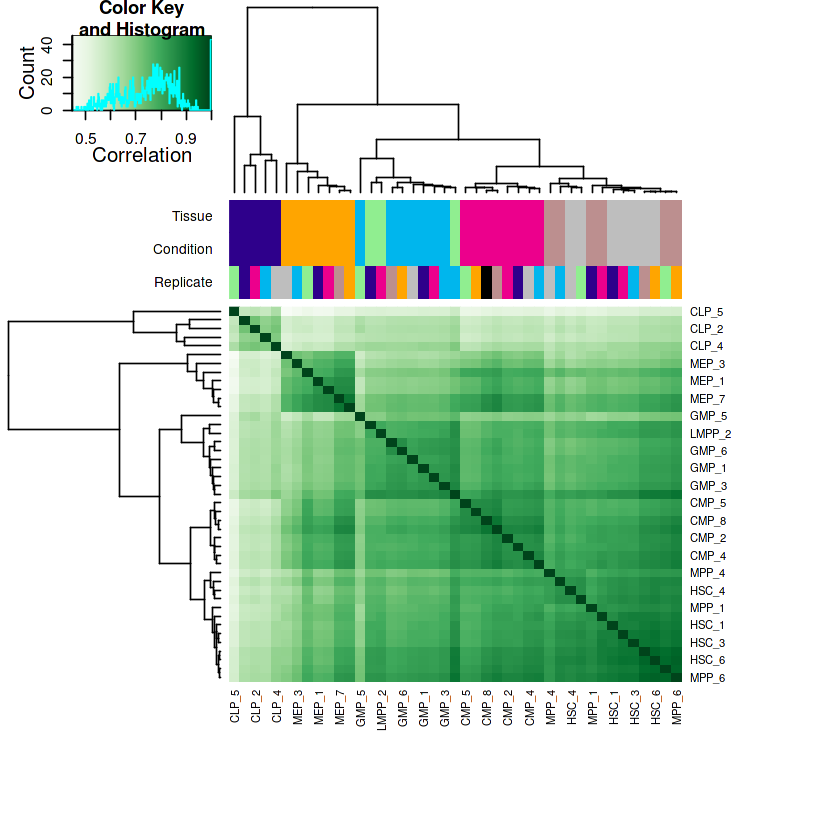

In [7]:
plot(corces,)

In [8]:
info <- dba.show(corces)
libsizes <- cbind(LibReads=info$Reads, FRiP=info$FRiP,PeakReads=round(info$Reads * info$FRiP))
rownames(libsizes) <- info$ID
libsizes

,LibReads,FRiP,PeakReads
CLP_1,10301992,0.27,2781538
CLP_2,12168902,0.28,3407293
CLP_3,4152490,0.35,1453372
CLP_4,3736525,0.49,1830897
CLP_5,892553,0.40,357021
CMP_1,5041417,0.54,2722365
CMP_2,5521358,0.54,2981533
CMP_3,8134230,0.55,4473826
CMP_4,6484938,0.54,3501867
CMP_5,6292430,0.48,3020366


In [9]:
corces_norm <- dba.normalize(corces)

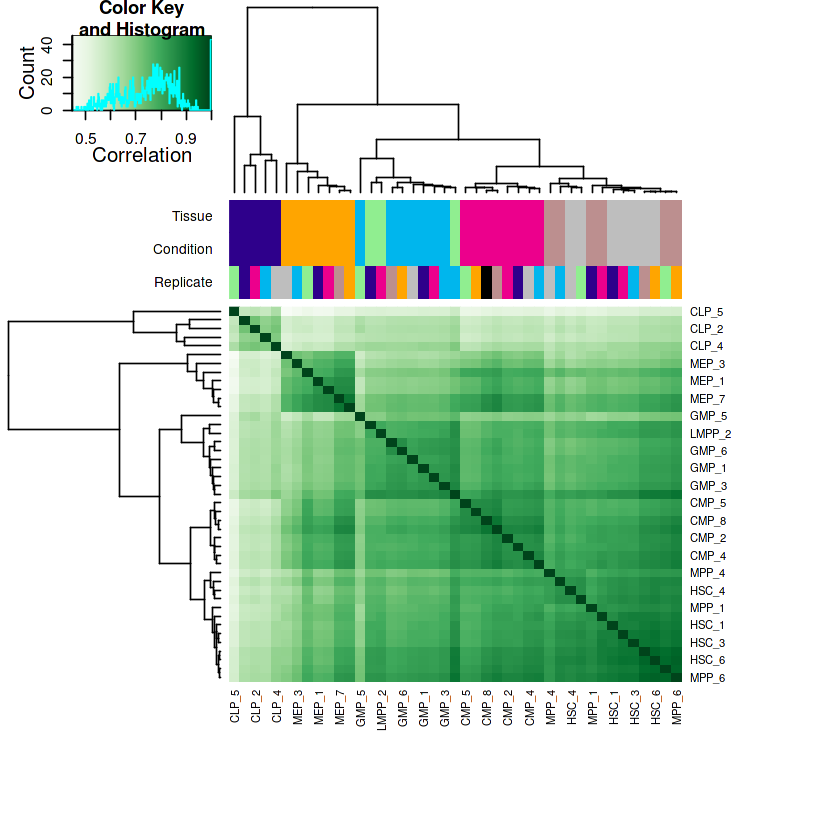

In [10]:
plot(corces_norm)

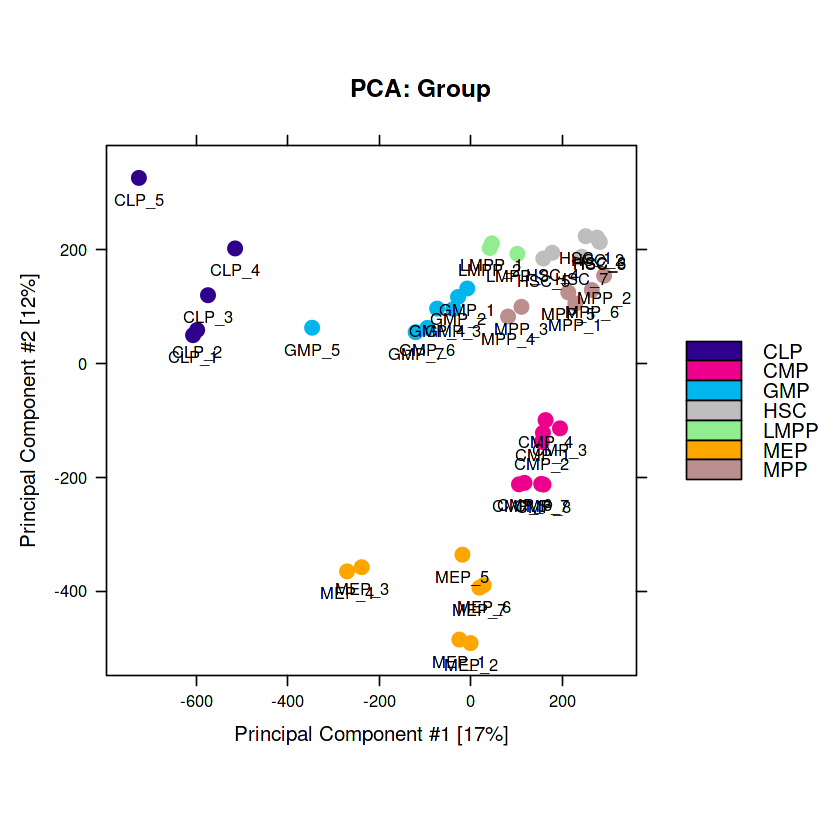

In [11]:
dba.plotPCA(corces_norm,  attributes=DBA_CONTROL, label=DBA_ID)

In [12]:
norm <- dba.normalize(corces_norm, bRetrieve=TRUE)
normlibs <- cbind(FullLibSize=norm$lib.sizes, NormFacs=norm$norm.factors, NormLibSize=round(norm$lib.sizes/norm$norm.factors))
rownames(normlibs) <- info$ID
normlibs

,FullLibSize,NormFacs,NormLibSize
CLP_1,10301992,1.2426703,8290206
CLP_2,12168902,1.4678649,8290206
CLP_3,4152490,0.5008911,8290206
CLP_4,3736525,0.4507156,8290206
CLP_5,892553,0.1076636,8290206
CMP_1,5041417,0.6081172,8290206
CMP_2,5521358,0.6660098,8290206
CMP_3,8134230,0.9811856,8290206
CMP_4,6484938,0.7822409,8290206
CMP_5,6292430,0.7590198,8290206


In [13]:
corces_norm <- dba.contrast(corces_norm, categories=DBA_CONDITION,minMembers = 2)

Computing results names...



In [14]:
corces_norm

43 Samples, 581378 sites in matrix:
       ID Tissue Condition Treatment Replicate    Reads FRiP
1   CLP_1    CLP       CLP   control         1 10301992 0.27
2   CLP_2    CLP       CLP   control         2 12168902 0.28
3   CLP_3    CLP       CLP   control         3  4152490 0.35
4   CLP_4    CLP       CLP   control         4  3736525 0.49
5   CLP_5    CLP       CLP   control         5   892553 0.40
6   CMP_1    CMP       CMP   control         1  5041417 0.54
7   CMP_2    CMP       CMP   control         2  5521358 0.54
8   CMP_3    CMP       CMP   control         3  8134230 0.55
9   CMP_4    CMP       CMP   control         4  6484938 0.54
10  CMP_5    CMP       CMP   control         5  6292430 0.48
11  CMP_6    CMP       CMP   control         6  7233650 0.50
12  CMP_7    CMP       CMP   control         7 14689965 0.56
13  CMP_8    CMP       CMP   control         8  9014575 0.55
14  GMP_1    GMP       GMP   control         1  4882479 0.53
15  GMP_2    GMP       GMP   control         2  5

In [15]:
dba.show(corces_norm, bContrasts=TRUE)

,Factor,Group,Samples,Group2,Samples2
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,CLP,5,CMP,8
2,Condition,CLP,5,GMP,7
3,Condition,CLP,5,HSC,7
4,Condition,CLP,5,LMPP,3
5,Condition,CLP,5,MEP,7
6,Condition,CLP,5,MPP,6
7,Condition,CMP,8,GMP,7
8,Condition,CMP,8,HSC,7
9,Condition,CMP,8,LMPP,3


In [17]:
corces_norm <- dba.analyze(corces_norm)

Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg38

Applying blacklist...

Removed: 246 of 581378 intervals.

Re-normalizing...

Removed 246 (of 581378) consensus peaks.

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [19]:
Corces_CLP_vs_CMP <- dba.report(corces_norm, contrast = 1)

In [20]:
Corces_CLP_vs_CMP
Corces_CLP_vs_CMP_df = as.data.frame(Corces_CLP_vs_CMP)

GRanges object with 93430 ranges and 6 metadata columns:
         seqnames              ranges strand |      Conc  Conc_CLP  Conc_CMP
            <Rle>           <IRanges>  <Rle> | <numeric> <numeric> <numeric>
  429940     chr5 119330308-119331172      * |   8.33351   2.32917   9.02528
  234152    chr18   45106365-45106765      * |   8.21511   4.43044   8.87471
  380509     chr4   10180311-10181968      * |   8.22434   4.43256   8.88415
  240464    chr18   77113932-77115602      * |   8.23959   4.16452   8.90672
  543845     chr9     7879508-7880269      * |   7.20145   8.54263   2.61090
     ...      ...                 ...    ... .       ...       ...       ...
  356851     chr3 103937921-103938321      * |  0.215999  1.155047   0.00000
  268554     chr2   55168237-55168949      * |  3.884280  3.266746   4.16836
  228704    chr18     9765511-9765911      * |  0.977724  1.892559   0.00000
  425685     chr5   94345224-94345624      * |  2.339924  0.965840   2.80864
   13817     chr1  

In [21]:
head(Corces_CLP_vs_CMP_df)

,seqnames,start,end,width,strand,Conc,Conc_CLP,Conc_CMP,Fold,p.value,FDR
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
429940,chr5,119330308,119331172,865,*,8.333514,2.329174,9.025284,-6.308656,4.177744e-71,2.144473e-65
234152,chr18,45106365,45106765,401,*,8.215108,4.430439,8.874712,-4.700340,8.351889e-71,2.144473e-65
380509,chr4,10180311,10181968,1658,*,8.224339,4.432561,8.884148,-4.756532,5.959745e-69,1.020169e-63
240464,chr18,77113932,77115602,1671,*,8.239585,4.164522,8.906721,-4.654534,1.207033e-64,1.549619e-59
543845,chr9,7879508,7880269,762,*,7.201449,8.542633,2.610899,5.756513,3.964956e-61,4.072248e-56
292767,chr2,187509896,187510724,829,*,7.731541,2.955679,8.411583,-5.385253,4.141856e-59,3.544946e-54


In [22]:
contrast_matrix = dba.show(corces_norm, bContrasts = TRUE)
contrast_matrix

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,CLP,5,CMP,8,93430
2,Condition,CLP,5,GMP,7,62458
3,Condition,CLP,5,HSC,7,103779
4,Condition,CLP,5,LMPP,3,59931
5,Condition,CLP,5,MEP,7,69351
6,Condition,CLP,5,MPP,6,85844
7,Condition,CMP,8,GMP,7,48697
8,Condition,CMP,8,HSC,7,56496
9,Condition,CMP,8,LMPP,3,28669


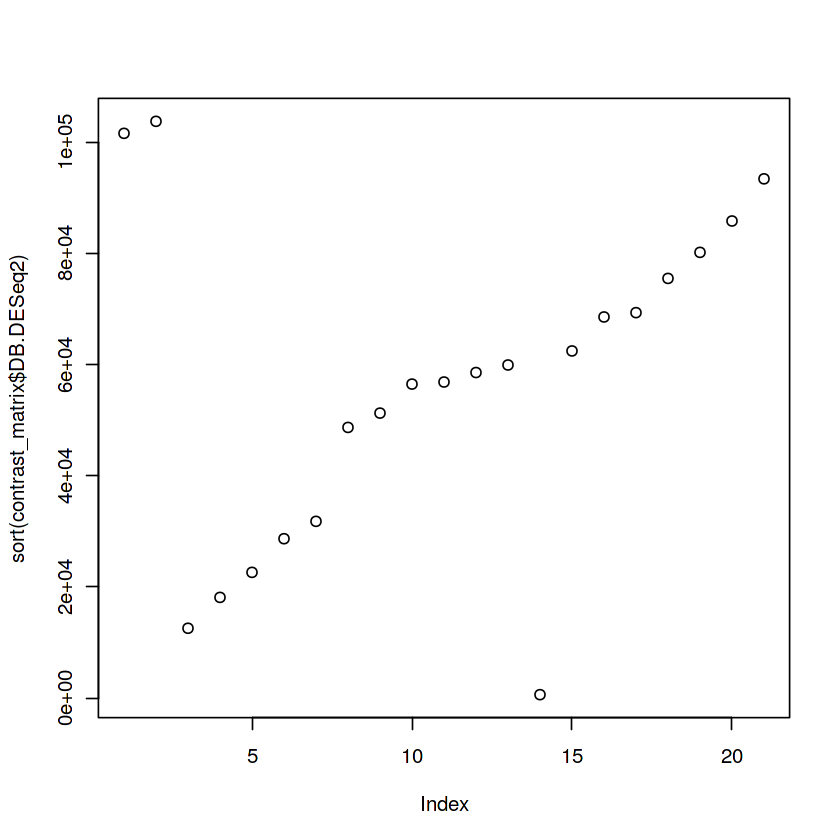

In [23]:
plot(sort(contrast_matrix$DB.DESeq2))

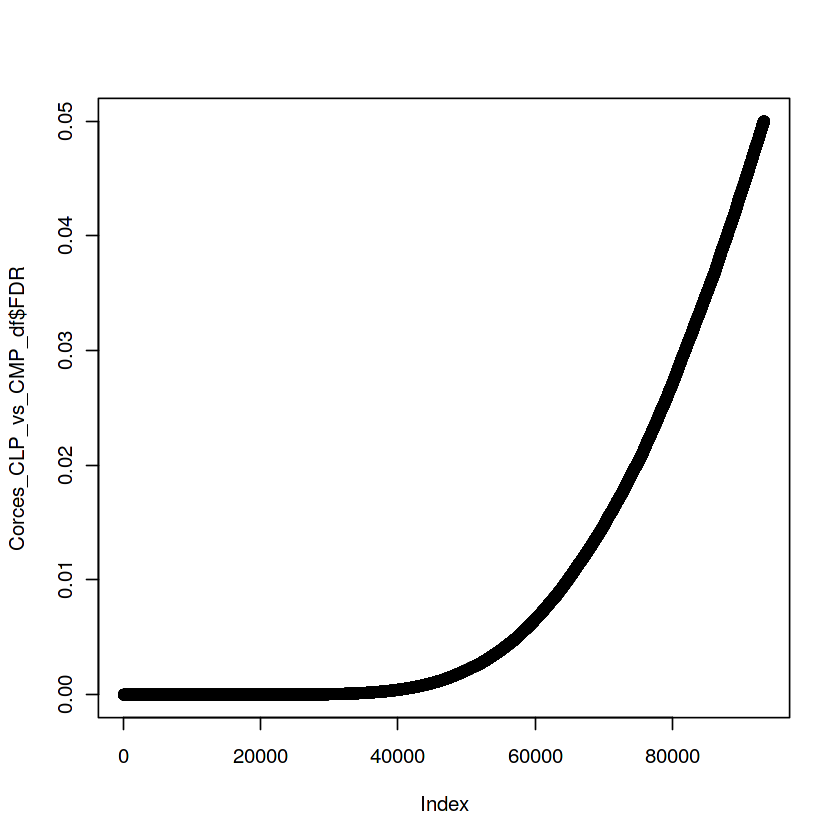

In [24]:
plot(Corces_CLP_vs_CMP_df$FDR)

In [25]:
granges_to_df <- function(granges_obj, contrast){
    report <- dba.report(granges_obj, contrast = contrast)
    report_df <- as.data.frame(report)
    region= paste(report_df$seqnames,report_df$start,sep=":")
    region=paste(region,report_df$end,sep="-")
    report_df["region"]=region
    return(report_df)
}

In [26]:
for (i in seq(1, NROW(contrast_matrix))){
    save_name = paste( gsub("-", "_", contrast_matrix[i,2], fixed = TRUE) , "_VS_" ,gsub("-", "_", contrast_matrix[i,4], fixed = TRUE), sep="")
   # print(i)
    print(paste(save_name, "_df", sep = ""))
}

[1] "CLP_VS_CMP_df"
[1] "CLP_VS_GMP_df"
[1] "CLP_VS_HSC_df"
[1] "CLP_VS_LMPP_df"
[1] "CLP_VS_MEP_df"
[1] "CLP_VS_MPP_df"
[1] "CMP_VS_GMP_df"
[1] "CMP_VS_HSC_df"
[1] "CMP_VS_LMPP_df"
[1] "CMP_VS_MEP_df"
[1] "CMP_VS_MPP_df"
[1] "GMP_VS_HSC_df"
[1] "GMP_VS_LMPP_df"
[1] "GMP_VS_MEP_df"
[1] "GMP_VS_MPP_df"
[1] "HSC_VS_LMPP_df"
[1] "HSC_VS_MEP_df"
[1] "HSC_VS_MPP_df"
[1] "LMPP_VS_MEP_df"
[1] "LMPP_VS_MPP_df"
[1] "MPP_VS_MEP_df"


In [27]:
CLP_VS_CMP_df = granges_to_df(corces_norm, contrast = 1)
CLP_VS_GMP_df = granges_to_df(corces_norm, contrast = 2)
CLP_VS_HSC_df = granges_to_df(corces_norm, contrast = 3)
CLP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 4)
CLP_VS_MEP_df = granges_to_df(corces_norm, contrast = 5)
CLP_VS_MPP_df = granges_to_df(corces_norm, contrast = 6)
CMP_VS_GMP_df = granges_to_df(corces_norm, contrast = 7)
CMP_VS_HSC_df = granges_to_df(corces_norm, contrast = 8)
CMP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 9)
CMP_VS_MEP_df = granges_to_df(corces_norm, contrast = 10)

CMP_VS_MPP_df = granges_to_df(corces_norm, contrast = 11)
GMP_VS_HSC_df = granges_to_df(corces_norm, contrast = 12)
GMP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 13)
GMP_VS_MEP_df = granges_to_df(corces_norm, contrast = 14)
GMP_VS_MPP_df = granges_to_df(corces_norm, contrast = 15)
HSC_VS_LMPP_df = granges_to_df(corces_norm, contrast = 16)
HSC_VS_MEP_df = granges_to_df(corces_norm, contrast = 17)
HSC_VS_MPP_df = granges_to_df(corces_norm, contrast = 18)
LMPP_VS_MEP_df = granges_to_df(corces_norm, contrast = 19)
LMPP_VS_MPP_df = granges_to_df(corces_norm, contrast = 20)
MPP_VS_MEP_df = granges_to_df(corces_norm, contrast = 21)



In [28]:
head(CLP_VS_CMP_df)

,seqnames,start,end,width,strand,Conc,Conc_CLP,Conc_CMP,Fold,p.value,FDR,region
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
429940,chr5,119330308,119331172,865,*,8.333514,2.329174,9.025284,-6.308656,4.177744e-71,2.144473e-65,chr5:119330308-119331172
234152,chr18,45106365,45106765,401,*,8.215108,4.430439,8.874712,-4.700340,8.351889e-71,2.144473e-65,chr18:45106365-45106765
380509,chr4,10180311,10181968,1658,*,8.224339,4.432561,8.884148,-4.756532,5.959745e-69,1.020169e-63,chr4:10180311-10181968
240464,chr18,77113932,77115602,1671,*,8.239585,4.164522,8.906721,-4.654534,1.207033e-64,1.549619e-59,chr18:77113932-77115602
543845,chr9,7879508,7880269,762,*,7.201449,8.542633,2.610899,5.756513,3.964956e-61,4.072248e-56,chr9:7879508-7880269
292767,chr2,187509896,187510724,829,*,7.731541,2.955679,8.411583,-5.385253,4.141856e-59,3.544946e-54,chr2:187509896-187510724


# ------------------------------------------------------------
### SELECT THE FEATURES CONSIDERING THE TREE STRUCTURE
# ------------------------------------------------------------

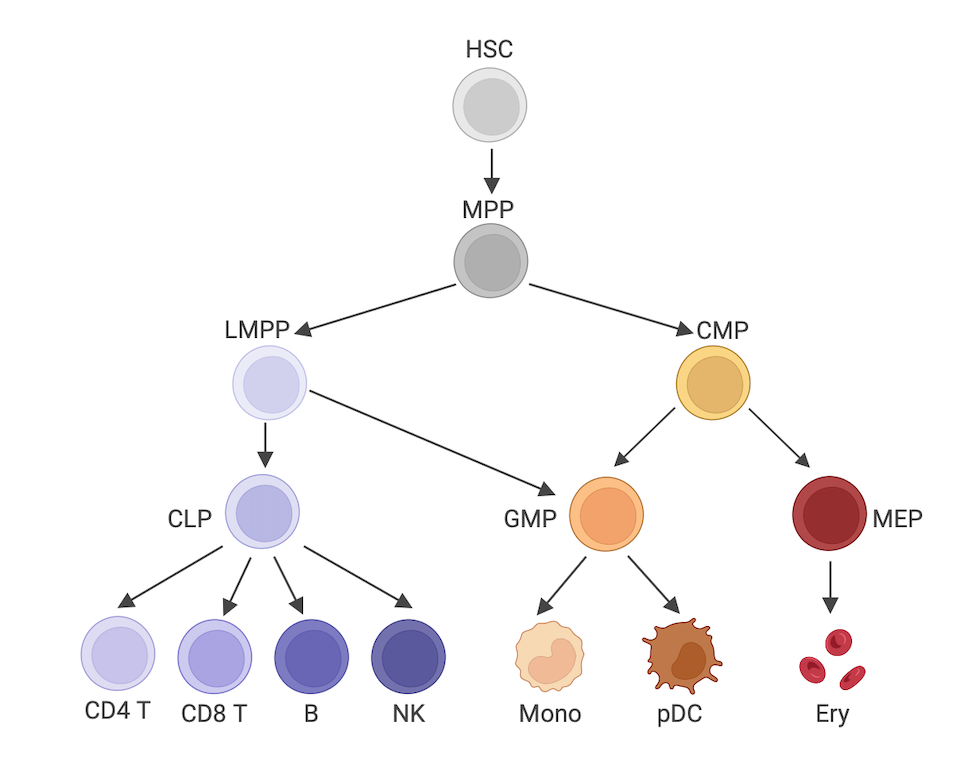

In [36]:
library("IRdisplay")
display_png(file="/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/preprocessing/Corces2016_bulk_ATAC/differentially_accessible_regions/only_progenitors-for_FACS_BM_scATAC/hematopoiesis.png")



In [39]:
tree_guided_combined_regions =c()
for (df in list(HSC_VS_MPP_df, LMPP_VS_MPP_df, CMP_VS_MPP_df,CLP_VS_LMPP_df, GMP_VS_LMPP_df, CMP_VS_GMP_df, CMP_VS_MEP_df)){
    tree_guided_combined_regions =  c(tree_guided_combined_regions,df[["region"]] )
    }

In [41]:
head(tree_guided_combined_regions)

[1] "chr1:170041538-170042208"  "chr14:55383587-55384231"  
[3] "chr8:105243706-105244360"  "chr10:98910035-98910435"  
[5] "chr10:111127422-111127822" "chr9:101569741-101570469"

In [74]:
sum_=0
combined_regions_size =c()
for (df_ in list(HSC_VS_MPP_df, LMPP_VS_MPP_df, CMP_VS_MPP_df,CLP_VS_LMPP_df, GMP_VS_LMPP_df, CMP_VS_GMP_df, CMP_VS_MEP_df)){
    print(dim(df_))
    sum_=sum_+as.integer(NROW(df_))
    combined_regions_size = c(combined_regions_size,as.numeric(as.character(dim(df_)[1])) )
    }

[1] 605  12
[1] 18109    12
[1] 31795    12
[1] 59931    12
[1] 12555    12
[1] 48697    12
[1] 51273    12


In [75]:
# plot the number of diff regions per comparison

comparisons <- c('HSC_VS_MPP_df', 'LMPP_VS_MPP_df', 'CMP_VS_MPP_df','CLP_VS_LMPP_df', 'GMP_VS_LMPP_df', 'CMP_VS_GMP_df', 'CMP_VS_MEP_df')
num_diff_reg <- combined_regions_size 
num_diff_reg_per_comparison_df <- data.frame(comparisons,num_diff_reg)
num_diff_reg_per_comparison_df

comparisons,num_diff_reg
<chr>,<dbl>
HSC_VS_MPP_df,605
LMPP_VS_MPP_df,18109
CMP_VS_MPP_df,31795
CLP_VS_LMPP_df,59931
GMP_VS_LMPP_df,12555
CMP_VS_GMP_df,48697
CMP_VS_MEP_df,51273


In [76]:
num_diff_reg_per_comparison_df = num_diff_reg_per_comparison_df[order(num_diff_reg_per_comparison_df$num_diff_reg),]

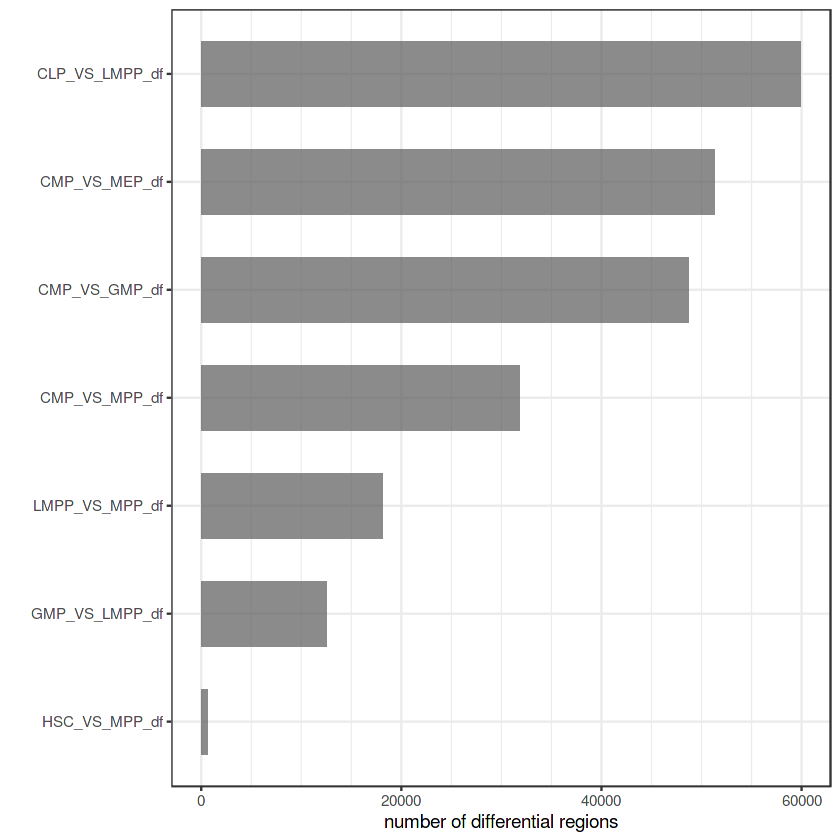

In [77]:
library(ggplot2)
library(dplyr)
library(forcats)
# Reorder following the value of another column:
plot_num_diff_regions_per_comparison <-num_diff_reg_per_comparison_df %>%
  mutate(comparisons = fct_reorder(comparisons, num_diff_reg)) %>%
  ggplot( aes(x=comparisons, y=num_diff_reg)) +
    geom_bar(stat="identity", , alpha=.7, width=.6) +
    coord_flip() +
    xlab("") + ylab("number of differential regions") +
    scale_y_continuous(minor_breaks = seq(0, 80000, 5000),) +
    theme_bw()
plot_num_diff_regions_per_comparison

In [81]:
ggsave("./only_progenitors-for_FACS_BM_scATAC/figures/plot_num_diff_regions_per_comparison.png")


Saving 6.67 x 6.67 in image



## OPTION: TOP 2000 REGIONS OF SELECTED PAIRWISE COMPARISONS - excludes chr Y

In [43]:
tree_guided_combined_regions_top2000 =c()
for (df_ in list(HSC_VS_MPP_df, LMPP_VS_MPP_df, CMP_VS_MPP_df,CLP_VS_LMPP_df, GMP_VS_LMPP_df, CMP_VS_GMP_df, CMP_VS_MEP_df)){
    df_= df_[df_[["seqnames"]] !="chrY",]
    top2000_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][1:2000,][["region"]]
    top2000_merged_name = gsub(":", "_", gsub("-", "_", top2000_regions, fixed = TRUE) , fixed = TRUE)
    tree_guided_combined_regions_top2000 =  c(tree_guided_combined_regions_top2000,top2000_merged_name )
}

In [44]:
tree_guided_combined_regions_top2000[1:50]

[1] "chr1_170049124_170049524"  "chr12_119665228_119665997"
 [3] "chr1_27542336_27543163"    "chr4_151671463_151672177" 
 [5] "chr5_89418406_89418806"    "chr4_42588918_42589318"   
 [7] "chr1_19325528_19325928"    "chr11_27420278_27421046"  
 [9] "chr10_98910035_98910435"   "chr16_21509147_21509547"  
[11] "chr1_170041538_170042208"  "chr16_59632421_59632821"  
[13] "chr3_52912904_52913535"    "chr16_19640038_19640438"  
[15] "chr11_13698113_13698513"   "chr6_139005513_139005913" 
[17] "chr1_65292809_65293395"    "chr6_84062494_84063166"   
[19] "chr16_21261455_21261855"   "chr5_72226943_72227343"   
[21] "chr13_44386948_44387348"   "chr6_152232757_152233414" 
[23] "chr9_106481042_106481830"  "chr5_168813609_168814009" 
[25] "chr14_55383587_55384231"   "chr3_158743603_158744274" 
[27] "chr8_73520569_73521250"    "chr6_16523614_16524014"   
[29] "chr8_105243706_105244360"  "chr8_73633075_73633475"   
[31] "chrX_48782867_48783267"    "chr16_53507751_53508151"  
[33] "chr12_94231682_94232082"   "chr15_45048461_45049485"  
[35] "chr6_126118268_126118668"  "chr9_101569741_101570469" 
[37] "chr19_38882732_38883132"   "chr1_147377843_147378243" 
[39] "chr10_101575886_101576286" "chr10_64867582_64867982"  
[41] "chr18_70025625_70026025"   "chr1_162386312_162386712" 
[43] "chr4_9936131_9936531"      "chr4_154623443_154623843" 
[45] "chr16_15521403_15522528"   "chr1_190759835_190760235" 
[47] "chr5_86526778_86527549"    "chr2_190459902_190460302" 
[49] "chr4_94550316_94550716"    "chr12_10959915_10960315"

In [45]:
tree_guided_combined_regions_top2000_sorted = sort(tree_guided_combined_regions_top2000)

In [46]:
tail(sort(tree_guided_combined_regions_top2000))

[1] "chrX_97866918_97867977" "chrX_97866918_97867977" "chrX_97866918_97867977"
[4] "chrX_97909227_97909627" "chrX_98398612_98399012" "chrX_98398612_98399012"

In [51]:
library(tidyr)
tree_guided_combined_regions_top2000_3col = as.data.frame(tree_guided_combined_regions_top2000_sorted) %>% 
   separate(tree_guided_combined_regions_top2000_sorted, into = c("seq", "start", "end"), sep="_")



Attaching package: ‘tidyr’


The following object is masked from ‘package:S4Vectors’:

    expand




In [52]:
head(tree_guided_combined_regions_top2000_3col)

,seq,start,end
,<chr>,<chr>,<chr>
1,chr10,100020256,100021268
2,chr10,100020256,100021268
3,chr10,100326930,100327819
4,chr10,100359053,100359818
5,chr10,100359053,100359818
6,chr10,100364146,100365211


In [53]:
dim(tree_guided_combined_regions_top2000_3col)

[1] 12605     3

In [54]:
tail(tree_guided_combined_regions_top2000_3col)


,seq,start,end
,<chr>,<chr>,<chr>
12600,chrX,97866918,97867977
12601,chrX,97866918,97867977
12602,chrX,97866918,97867977
12603,chrX,97909227,97909627
12604,chrX,98398612,98399012
12605,chrX,98398612,98399012


In [58]:
getwd()

[1] "/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/preprocessing/Corces2016_bulk_ATAC/differentially_accessible_regions"

In [59]:
write.table(tree_guided_combined_regions_top2000_3col, "../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/only_progenitors-for_FACS_BM_scATAC/Corces2016_tree_guided_pairwise_differential_cCREs_FDR0.05_top2000.bed", sep = "\t", col.names=FALSE,quote=FALSE, row.names = FALSE)


In [62]:
exact_match_tree_guided_differential_cCREs_top2000= read.table("../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/only_progenitors-for_FACS_BM_scATAC/Corces2016_tree_guided_pairwise_differential_cCREs_FDR0.05_top2000_sorted_exactCREs.bed", header = FALSE, sep="\t")

In [63]:
head(exact_match_tree_guided_differential_cCREs_top2000)

,V1,V2,V3
,<chr>,<int>,<int>
1,chr1,1842820,1843169
2,chr1,2045674,2045954
3,chr1,2045981,2046261
4,chr1,2104559,2104857
5,chr1,2105004,2105350
6,chr1,2151283,2151598


In [64]:
dim(exact_match_tree_guided_differential_cCREs_top2000)

[1] 14037     3

In [65]:
exact_match_tree_guided_differential_cCREs_top2000["region"]=paste(exact_match_tree_guided_differential_cCREs_top2000$V1, exact_match_tree_guided_differential_cCREs_top2000$V2, exact_match_tree_guided_differential_cCREs_top2000$V3, sep="_")

In [66]:
head(exact_match_tree_guided_differential_cCREs_top2000)

,V1,V2,V3,region
,<chr>,<int>,<int>,<chr>
1,chr1,1842820,1843169,chr1_1842820_1843169
2,chr1,2045674,2045954,chr1_2045674_2045954
3,chr1,2045981,2046261,chr1_2045981_2046261
4,chr1,2104559,2104857,chr1_2104559_2104857
5,chr1,2105004,2105350,chr1_2105004_2105350
6,chr1,2151283,2151598,chr1_2151283_2151598


In [67]:
head(exact_match_tree_guided_differential_cCREs_top2000)

,V1,V2,V3,region
,<chr>,<int>,<int>,<chr>
1,chr1,1842820,1843169,chr1_1842820_1843169
2,chr1,2045674,2045954,chr1_2045674_2045954
3,chr1,2045981,2046261,chr1_2045981_2046261
4,chr1,2104559,2104857,chr1_2104559_2104857
5,chr1,2105004,2105350,chr1_2105004_2105350
6,chr1,2151283,2151598,chr1_2151283_2151598


In [70]:
write.table(exact_match_tree_guided_differential_cCREs_top2000["region"], "../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/only_progenitors-for_FACS_BM_scATAC/Corces2016_tree_guided_pairwise_differential_cCREs_FDR0.05_top2000_sorted_exactCREs.csv", sep = ",", col.names=FALSE,quote=FALSE, row.names = FALSE)


In [73]:
save.image(file = "./only_progenitors-for_FACS_BM_scATAC/WS/only_progenitors-for_FACS_BM_scATAC_diffBind.RData")

In [82]:
saveRDS(corces_norm, "./only_progenitors-for_FACS_BM_scATAC/WS/only_progenitors-for_FACS_BM_scATAC_corces_norm.RDS")
